In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# set the path of the processed data
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
df= pd.read_csv(os.path.join(processed_data_path, 'out.csv'))

# drop the id column
df = df.drop(df.columns[0], axis=1)

df.describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,...,AptManageType_management_in_trust,AptManageType_self_management,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Daegu,SubwayStation_Sin-nam,SubwayStation_Myung-duk,SubwayStation_Chil-sung-market,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_no_subway_nearby
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.00000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,221218.112545,2002.967408,2012.691563,6.160244,955.569173,12.026311,195.883551,570.761670,1.756069,2.886776,...,0.940757,0.059243,0.27907,0.014429,0.110508,0.255814,0.019521,0.125106,0.126973,0.068579
std,106384.186446,8.811782,2.905488,3.387752,382.464050,7.548743,218.597210,408.621075,0.450706,1.266218,...,0.236099,0.236099,0.44858,0.119260,0.313548,0.436355,0.138360,0.330867,0.332971,0.252759
min,32743.000000,1978.000000,2007.000000,1.000000,135.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,144247.000000,1993.000000,2010.000000,3.000000,644.000000,6.000000,11.000000,184.000000,2.000000,2.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207964.000000,2006.000000,2013.000000,6.000000,910.000000,11.000000,100.000000,536.000000,2.000000,3.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,291150.000000,2008.000000,2015.000000,9.000000,1149.000000,17.000000,249.000000,798.000000,2.000000,4.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,585840.000000,2015.000000,2017.000000,12.000000,2337.000000,43.000000,713.000000,1321.000000,2.000000,4.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,...,AptManageType_management_in_trust,AptManageType_self_management,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Daegu,SubwayStation_Sin-nam,SubwayStation_Myung-duk,SubwayStation_Chil-sung-market,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_no_subway_nearby
0,141592,2006,2007,8,814,3,111.0,184.0,1,2,...,1,0,1,0,0,0,0,0,0,0
1,51327,1985,2007,8,587,8,80.0,76.0,2,3,...,0,1,0,1,0,0,0,0,0,0
2,48672,1985,2007,8,587,6,80.0,76.0,2,3,...,0,1,0,1,0,0,0,0,0,0
3,380530,2006,2007,8,2056,8,249.0,536.0,2,4,...,1,0,0,0,1,0,0,0,0,0
4,221238,1993,2007,8,1761,3,523.0,536.0,2,1,...,1,0,0,0,0,1,0,0,0,0


## Train-Test Split

train:70%, test:30%

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:].values
y= df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Standardization

In [5]:
from sklearn import preprocessing

stdsc = preprocessing.StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

## Model Training - Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
tr = DecisionTreeRegressor(random_state=0)

In [8]:
tr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

## Model Evaluation

In [9]:
from sklearn import metrics

y_pred = tr.predict(X_test)

print ("Mean aboslute error : %.3f" %metrics.mean_absolute_error(y_test, y_pred))
print ("Median aboslute error : %.3f" %metrics.median_absolute_error(y_test, y_pred))
print('Variance score: %.3f' %metrics.explained_variance_score(y_test, y_pred))

Mean aboslute error : 12494.113
Median aboslute error : 7425.000
Variance score: 0.965


## Model Training - Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rf = RandomForestRegressor(random_state=0)

In [12]:
rf.fit(X_train, y_train)

C:\Users\cgreco\.virtualenvs\ml-demo-dcmuB5ai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

## Model Evaluation

Text(0.5, 1.0, 'Predicted vs Actual Price')

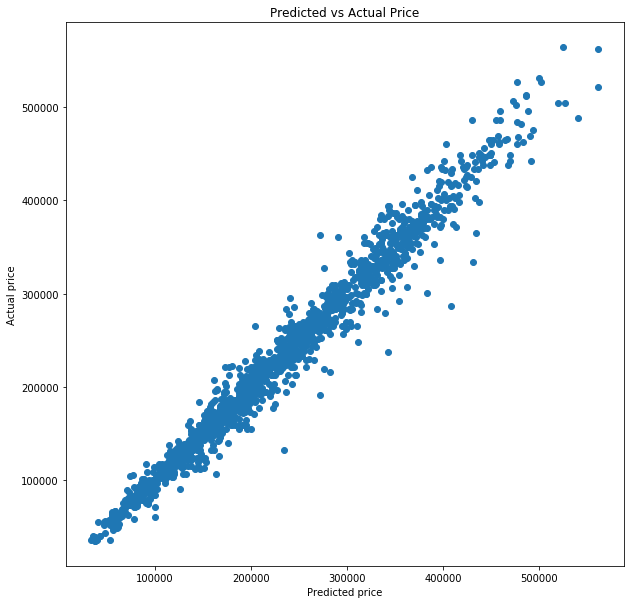

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(rf.predict(X_test), y_test)

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Predicted vs Actual Price')

In [14]:
from sklearn import metrics

y_pred = rf.predict(X_test)

print ("Mean aboslute error : %.3f" %metrics.mean_absolute_error(y_test, y_pred))
print ("Median aboslute error : %.3f" %metrics.median_absolute_error(y_test, y_pred))
print('Variance score: %.3f' %metrics.explained_variance_score(y_test, y_pred))

Mean aboslute error : 10443.934
Median aboslute error : 6437.850
Variance score: 0.977


In [15]:
importance_df = pd.Series(rf.feature_importances_, index=df.columns[1:])

Text(0.5, 1.0, 'Feture Importance in Regression Model')

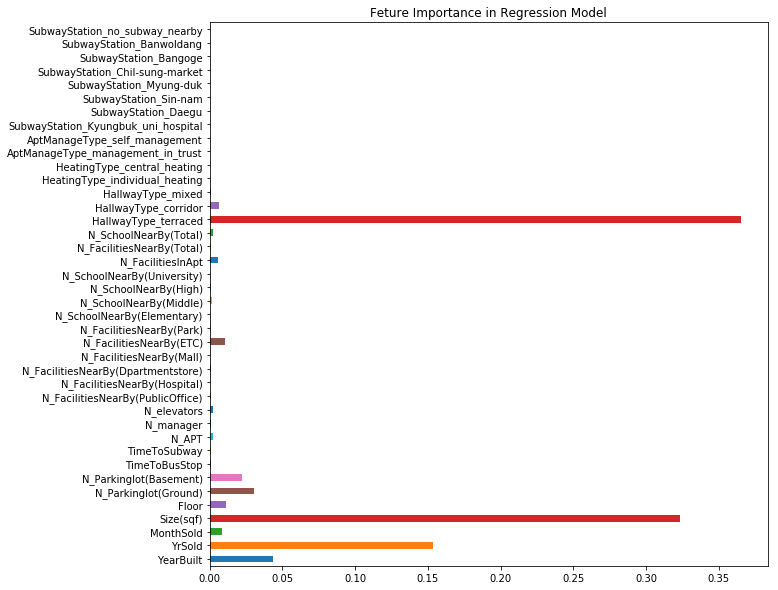

In [16]:
plt.figure(figsize=(10,10))
importance_df.plot(kind = 'barh')
plt.title('Feture Importance in Regression Model')

## Save Model to Disk

In [20]:
# set the path of the model directory
model_dir = os.path.join(os.path.pardir, 'models')

from sklearn.externals import joblib

model_file_path = os.path.join(model_dir, 'rf_model.joblib')
scaler_file_path = os.path.join(model_dir, 'rf_scaler.joblib')

with open(model_file_path, 'wb') as m, open(scaler_file_path, 'wb') as s:
    joblib.dump(rf, m)
    joblib.dump(stdsc, s)